# Lesson 3 Assignment - Monty Hall Simulation
## Author - Lawrence Huang

### Instructions
Simulate the conditional probabilities of the distributions for winning a car vs. a goat for the Monty Hall Problem that includes the following:
1. the cases for switching or not switching
2. histograms and summary statistics (at least mean and variance) of the results for winning the car or a goat for both strategies: switching or not switching
3. comparison of the cases to determine the best strategy
4. recommended strategy



#### Note: 
Please clearly outline the results and your recommendation with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
# Import libraries
%matplotlib inline
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b>Results outline</b>:<p>
    <li>1. Simulate one iteration of the game</li>
    <li>2. Simulate multiple iterations of the game</li>
    <li>3. Repeat simulation</li>
    <li>4. Recommend strategy</li>
    <p><p><b>Game assumptions</b>:<p>
<li>1. There are 3 doors, 2 non-winning (goat) and 1 winning (car).</li>
<li>2. The host must always open 1 door that was not picked by the user.</li>
<li>3. The host must always open a non-winning door and never the winning door.</li>
<li>4. The host must always offer the chance to switch between the originally chosen door and the remaining closed door.</li>

In [2]:
num_doors = 3 # number of doors
door_list = np.arange(num_doors) # door list 

# function to simulate one iteration of the game
def play_game():
    winning_door = random.choice(door_list) # winning door
    user_pick = random.choice(door_list) # user pick
    
    monty_unavailable = [] # Monty will not choose winning door or user pick
    monty_unavailable.extend([winning_door, user_pick])
    monty_pick = random.choice(list(set(door_list)-set(monty_unavailable))) # Monty pick (assume Monty picks 1 door)
    
    switch_unavailable = [] # Cannot switch to user pick or Monty pick
    switch_unavailable.extend([user_pick, monty_pick])
    switch = random.choice(list(set(door_list)-set(switch_unavailable))) # Switch pick
    
    door = pd.DataFrame({'Winning':winning_door, 'User':user_pick, 
                                 'Monty':monty_pick, 'Switch':switch}, index=[0])
    return door

In [3]:
# run simulation over multiple iterations of the game    
def run_simulation(num_sims=10000, do_plots=0):
    # num_sims: number of simulations, e.g. 10000
    doors=pd.DataFrame()
    ii=0
    while ii < num_sims:    
        door = play_game()
        doors = doors.append(door, ignore_index=True)
        ii+=1
    
    doors['Win_orig']  =  doors['User']==doors['Winning'] # Check user pick against winning door
    doors['Win_switch'] = doors['Switch']==doors['Winning'] # Check switch pick against winning door
    
    if do_plots: # generate optional plots
        fig, ax = plt.subplots()
        plt.hist([doors['Winning'], doors['User']], label=['Winning door', 'User pick'], bins=num_doors, range=(0, num_doors))
        plt.legend()
        ax.set_xticks(np.arange(num_doors)+0.5)
        ax.set_xticklabels(range(num_doors))
        ax.legend(bbox_to_anchor=(0.6, 1.25)) 
        ax.set_xlabel('Door number')
        ax.set_ylabel('Frequency')
        plt.subplots_adjust(top=0.95)
        plt.suptitle('Fig. 1: Histogram of user pick and winning door') 
        fig.tight_layout()
        plt.show()
        
        fig, ax = plt.subplots(figsize=(4,4))
        plt.bar(x=0, height=sum(doors['Win_orig'])/doors.shape[0], label='No switch')
        plt.bar(x=1, height=sum(doors['Win_switch'])/doors.shape[0], label='Switch')
        ax.set_xticks([])
        ax.set_ylabel('Winning fraction')
        ax.legend()
        plt.subplots_adjust(top=0.9)
        plt.suptitle('Fig. 2: Winning frequency out of {} simulations'.format(num_sims)) 
        plt.show()
    
    # generate optional conditional plots (depending on whether user originally picked winning door or not)
    guess_right = doors[doors['Win_orig']==True] # User originally picked winning door
    guess_wrong = doors[doors['Win_orig']==False] # User originally did not pick winning door
    
    if do_plots:
        fig, axs = plt.subplots(1,3, figsize=(6,4))
        for xx in range(num_doors):
            axs[xx].hist(guess_right.groupby('User').get_group(xx)['User'],bins=num_doors, range=(0, num_doors))
            axs[xx].hist(guess_right.groupby('User').get_group(xx)['Monty'],bins=num_doors, range=(0, num_doors))
            axs[xx].set_xlim(left=0, right=num_doors)
            axs[xx].set_xticks(np.arange(num_doors)+0.5)
            axs[xx].set_xticklabels(range(num_doors))
        axs[2].legend(bbox_to_anchor=(0.95, 0.5))    
        fig.tight_layout()
        axs[0].set_ylabel('Frequency')
        axs[1].set_xlabel('Door number')
        plt.subplots_adjust(top=0.85)
        plt.suptitle('Fig. 3: Histogram of user pick and monty pick\n original user pick is the winning door') 
        plt.show()
    
        fig, axs = plt.subplots(3,3, figsize=(6,8))
        for xx in range(3):
            for yy in range(3):
                if xx!=yy:
                    axs[xx,yy].hist(guess_wrong.groupby(['Winning', 'User']).get_group((xx, yy))['User'],bins=num_doors, range=(0, num_doors))
                    axs[xx,yy].hist(guess_wrong.groupby(['Winning', 'User']).get_group((xx, yy))['Monty'],bins=num_doors, range=(0, num_doors))
                    axs[xx,yy].hist(guess_wrong.groupby(['Winning', 'User']).get_group((xx, yy))['Winning'],bins=num_doors, range=(0, num_doors))
                    axs[xx,yy].set_xticks(np.arange(num_doors)+0.5)
                    axs[xx,yy].set_xticklabels(range(num_doors))
                    axs[xx,yy].set_title('Winning: #{}\nUser: #{}'.format(xx,yy))
                if xx==yy:
                    axs[xx,yy].axis('off')
        handles, labels = axs[0,1].get_legend_handles_labels()
        axs[0,0].legend(bbox_to_anchor=(0.75, 1.05), handles=handles, labels=labels)
        axs[2,1].set_xlabel('Door #')
        axs[1,0].set_ylabel('Frequency')
        
        plt.subplots_adjust(top=9)
        plt.suptitle('Fig. 4: Histogram of user pick, monty pick, and winning pick\n original user pick is not the winning door') 
        fig.tight_layout()
        plt.show()
    
    # print simulation results
    print('Simulation results')
    print('Numer of trials: '+str(num_sims))
    print('No switching: user won '+str(sum(doors['Win_orig']))+' times ('+str(sum(doors['Win_orig'])/num_sims*100)+'%'+')')
    print('Switching: user won '+str(sum(doors['Win_switch']))+' times ('+str(sum(doors['Win_switch'])/num_sims*100)+'%'+')')
    
    return doors

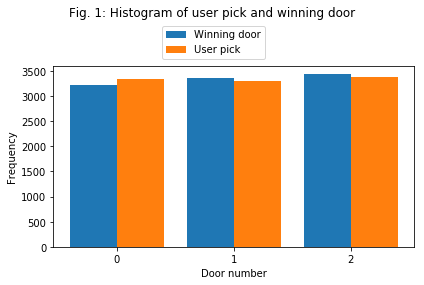

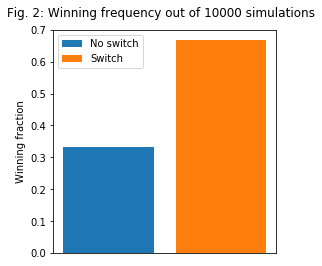

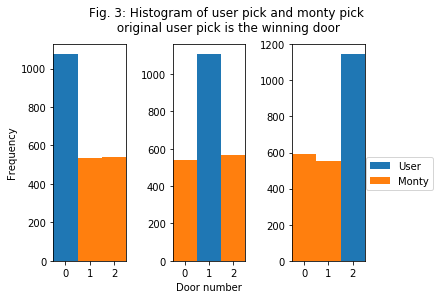

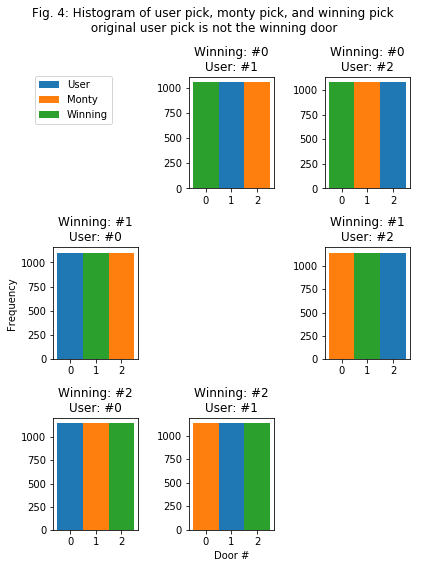

Simulation results
Numer of trials: 10000
No switching: user won 3327 times (33.269999999999996%)
Switching: user won 6673 times (66.73%)


In [4]:
# run simulation (play game 10000 times)
test_simulation = run_simulation(do_plots=1)

<b>Simulation results and verification of game mechanics</b>:<p>
<li>Fig. 1: Shows distribution of winning door number and user pick. Both are consistent with the expected probability of 1/3.</li>
<li>Fig. 2: Shows winning frequency by not switching (1/3) and switching (2/3). <u>The chance of winning doubles if the user switched</u>.</li>
<li>Fig. 3: Shows distribution of user and Monty picks, given that user originally picks the winning door (expected to happen 1/3 of the time). Monty then had equal probability (1/2) to open either of the remaining doors.</li>
<li>Fig. 4: Shows distribution of user and Monty picks, and the winning door, given that user originally did not pick the winning door (expected to happen 2/3 of the time). Monty then had only one remaining choice.</li>

In [5]:
# display resulant table 
# index/rows: game number (out of 10000 simulations)
# columns: 
# Winning: Winning door; User: User pick; Monty: Monty pick; Switch: User switch, 
# Win_orig: User win if not switch (True or False); Win_switch: User win if switch (True or False)
test_simulation.head(10)

,Winning,User,Monty,Switch,Win_orig,Win_switch
0,1,2,0,1,False,True
1,0,2,1,0,False,True
2,1,0,2,1,False,True
3,2,1,0,2,False,True
4,1,2,0,1,False,True
5,0,0,2,1,True,False
6,2,2,0,1,True,False
7,2,0,1,2,False,True
8,2,1,0,2,False,True
9,1,0,2,1,False,True


In [6]:
# replicate simulation multiple (e.g. 100) times to get summary statistics
replicas = 100 # number of replications
win_origs = []
win_switchs = []
ii=0
while ii < replicas:
    print('Simulation {} of {}'.format(ii+1, replicas))
    doors = run_simulation()
    print('################')
    win_origs.append(sum(doors['Win_orig']))
    win_switchs.append(sum(doors['Win_switch']))
    ii+=1
# compile win statistics without and with switching
all_replicas={}
all_replicas['win_origs'] = win_origs
all_replicas['win_switchs'] = win_switchs
all_replicas = pd.DataFrame(all_replicas)

Simulation 1 of 100
Simulation results
Numer of trials: 10000
No switching: user won 3319 times (33.19%)
Switching: user won 6681 times (66.81%)
################
Simulation 2 of 100
Simulation results
Numer of trials: 10000
No switching: user won 3260 times (32.6%)
Switching: user won 6740 times (67.4%)
################
Simulation 3 of 100
Simulation results
Numer of trials: 10000
No switching: user won 3301 times (33.01%)
Switching: user won 6699 times (66.99000000000001%)
################
Simulation 4 of 100
Simulation results
Numer of trials: 10000
No switching: user won 3351 times (33.51%)
Switching: user won 6649 times (66.49000000000001%)
################
Simulation 5 of 100
Simulation results
Numer of trials: 10000
No switching: user won 3383 times (33.83%)
Switching: user won 6617 times (66.17%)
################
Simulation 6 of 100
Simulation results
Numer of trials: 10000
No switching: user won 3418 times (34.18%)
Switching: user won 6582 times (65.82000000000001%)
###########

Simulation results
Numer of trials: 10000
No switching: user won 3337 times (33.37%)
Switching: user won 6663 times (66.63%)
################
Simulation 51 of 100
Simulation results
Numer of trials: 10000
No switching: user won 3253 times (32.53%)
Switching: user won 6747 times (67.47%)
################
Simulation 52 of 100
Simulation results
Numer of trials: 10000
No switching: user won 3318 times (33.18%)
Switching: user won 6682 times (66.82000000000001%)
################
Simulation 53 of 100
Simulation results
Numer of trials: 10000
No switching: user won 3315 times (33.15%)
Switching: user won 6685 times (66.85%)
################
Simulation 54 of 100
Simulation results
Numer of trials: 10000
No switching: user won 3274 times (32.74%)
Switching: user won 6726 times (67.25999999999999%)
################
Simulation 55 of 100
Simulation results
Numer of trials: 10000
No switching: user won 3376 times (33.76%)
Switching: user won 6624 times (66.24%)
################
Simulation 56 of 10

Simulation results
Numer of trials: 10000
No switching: user won 3303 times (33.03%)
Switching: user won 6697 times (66.97%)
################
Simulation 100 of 100
Simulation results
Numer of trials: 10000
No switching: user won 3346 times (33.46%)
Switching: user won 6654 times (66.53999999999999%)
################


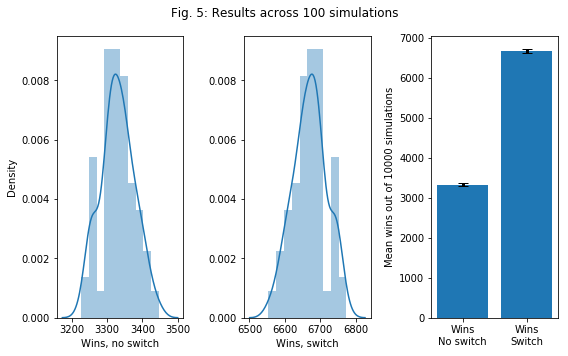

Results across 100 simulations:
Switching: 3329.48 +/- 47.44 wins
Not switching: 6670.52 +/- 47.44 wins


In [7]:
# Summary statistics and plots across simulations 
num_sims2 = 10000 # redefine number of simulations per replication for plot annotation
fig, axs = plt.subplots(1,3, figsize=(8,5))
sns.distplot(all_replicas['win_origs'], bins=10, ax=axs[0])
axs[0].set_xlabel('Wins, no switch')
sns.distplot(all_replicas['win_switchs'], bins=10, ax=axs[1])
axs[1].set_xlabel('Wins, switch')
axs[0].set_ylabel('Density')
axs[2].bar(x=range(all_replicas.shape[1]), height=all_replicas.mean(), yerr=all_replicas.std(), error_kw=dict(elinewidth=3, capsize=5))
axs[2].set_xticks(range(all_replicas.shape[1]))
axs[2].set_xticklabels(['Wins\nNo switch','Wins\nSwitch'], rotation=0)
axs[2].set_ylabel('Mean wins out of {} simulations'.format(num_sims2))
fig.tight_layout()
plt.suptitle('Fig. 5: Results across {} simulations'.format(replicas))
plt.subplots_adjust(top=0.9)
plt.show()

print('Results across {} simulations:'.format(replicas))
print('Switching: {} +/- {} wins'.format(np.round(all_replicas['win_origs'].mean(),2), np.round(all_replicas['win_origs'].std(),2)))
print('Not switching: {} +/- {} wins'.format(np.round(all_replicas['win_switchs'].mean(),2), np.round(all_replicas['win_switchs'].std(),2)))

<b>Summary across simulations/replicas</b>:<p>
<li>Fig. 5: Shows distribution of wins and mean wins (+/- standard deviation) without and with switching.</li>
<li>Across replicas, <u>switching consistently provided higher chances of winning (2/3) than not switching (1/3)</u>.</li>

<p><p>
    <b>Conclusion and recommended stategy</b>: <u>switch door</u>.